In [27]:
import pandas as pd 
import numpy as np 

from tools_tolgay import functions_readfiles as readfiles

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'cm'
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 100

In [28]:

runs = {
    # "interpolated_from_luminosity_per_mass_by_dividing_to_4pi_RBFInterpolator_N200": {
        # "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017",
    #     "label": "L/M/4π RBFInterpolator N200",
    #     "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_RBFInterpolator_N200_smoothingLength_interpolation.txt",
    #     "color": "magenta",
    # },
    # "expected from flux":{
        # "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017",
    #     "label": "Expected from flux",
    #     "file_name": "luminosity_from_flux_smoothingLength_expected.txt",
    #     "color": "blue",
    # },
    "expected from luminosity per mass by dividing to 4pi":{
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017",
        "label": "Expected from L/M/4π MW metallicity",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "orange",
    },
    "expected from luminosity per mass by dividing to 4pi Z=1":{
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity1",
        "label": "Expected from L/M/4π Z=1",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "red",
    },
    "expected from luminosity per mass by dividing to 4pi Z=2":{
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity2",
        "label": "Expected from L/M/4π Z=2",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "brown",
    },
    "expected from luminosity per mass by dividing to 4pi Z=3":{
        "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity3",
        "label": "Expected from L/M/4π Z=3",
        "file_name": "luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt",
        "color": "purple",
    },
    # "expected from luminosity per mass":{
    #     "base_fdir": "/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity1",
    #     "label": "Expected from L/M",
    #     "file_name": "luminosity_from_luminosity_per_mass_smoothingLength_expected.txt",
    #     "color": "green",
    # },
}

for key, value in runs.items():
    
    base_fdir = value["base_fdir"]
    file_name = value["file_name"]

    path_to_file = f"{base_fdir}/{file_name}"
    print(path_to_file)
    data = pd.read_csv(path_to_file, comment="#", sep=",")

    value["data"] = data
    


/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt
/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity1/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt
/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity2/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt
/scratch/dtolgay/cloudy_runs/z_0/miville_deschenes_2017_metallicity3/luminosity_from_luminosity_per_mass_by_dividing_to_4pi_smoothingLength_expected.txt


In [29]:
high_metallicity_indices = runs['expected from luminosity per mass by dividing to 4pi']['data']['metallicity'] > 2.5
cloud_ids_with_high_metallicity = runs['expected from luminosity per mass by dividing to 4pi']['data'].loc[high_metallicity_indices, 'Cloud']

print(cloud_ids_with_high_metallicity)

0          1
1          2
2          3
4          5
5          6
        ... 
7998    7999
7999    8000
8005    8006
8006    8007
8102    8103
Name: Cloud, Length: 360, dtype: int64


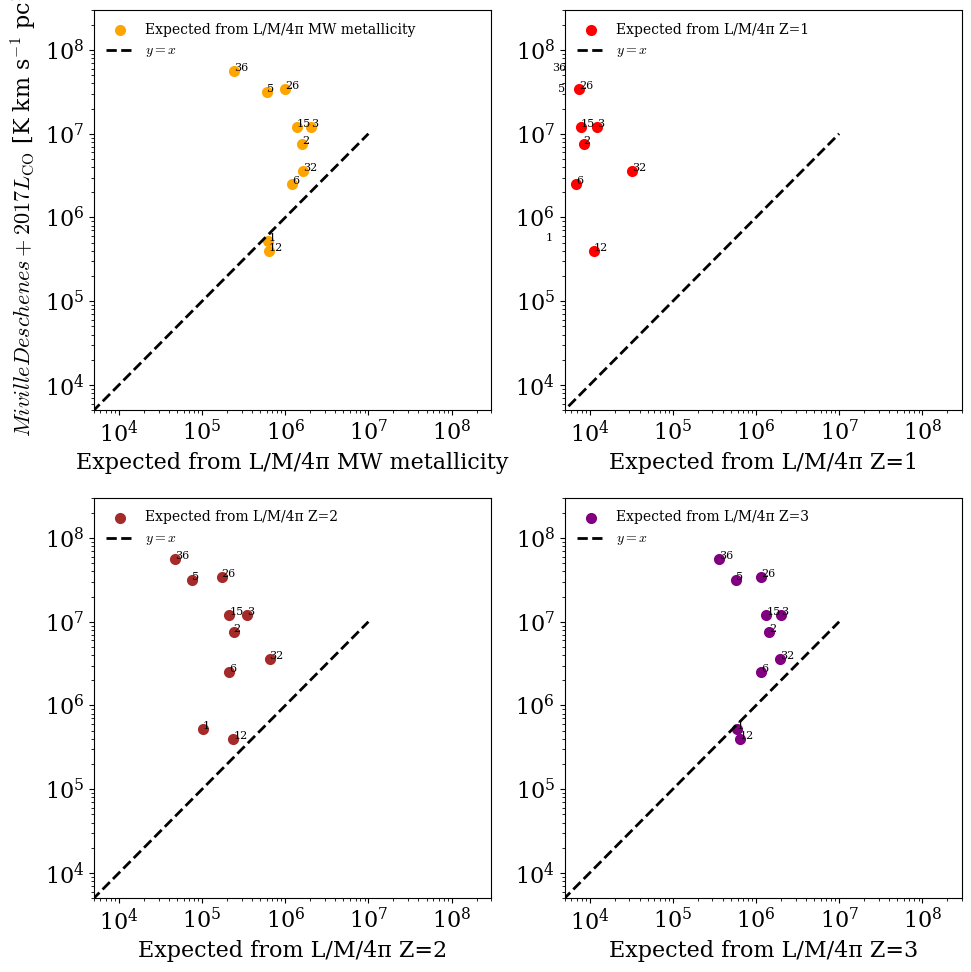

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100)
axs = axs.flatten()

##### Filtering the rows to plot #####

high_metallicity_indices = runs['expected from luminosity per mass by dividing to 4pi']['data']['metallicity'] > 2.5
cloud_ids_with_high_metallicity = runs['expected from luminosity per mass by dividing to 4pi']['data'].loc[high_metallicity_indices, 'Cloud']

# Pick first 10 id's 
ids_picked = cloud_ids_with_high_metallicity.iloc[:10].values


##### Plotting #####
for counter, (key, value) in enumerate(runs.items()):

    # Create a mask to filter the data
    mask = value["data"]['Cloud'].isin(ids_picked)

    data = value["data"].loc[mask]           # choose by index labels
    label = value["label"]
    color = value["color"]
    
    ax = axs[counter]
    ax.scatter(
        data["L_co_10"], 
        data["Lco"], 
        label=label, 
        color=color,
        lw=2,
    )
    ax.plot(
        [1e2, 1e7], 
        [1e2, 1e7], 
        ls="--", 
        color="black", 
        lw=2, 
        label=r"$y=x$"
    )

    # print the corresponding row for each scatter point
    for i in range(len(data)):
        ax.text(
            data["L_co_10"].iloc[i],
            data["Lco"].iloc[i],
            f"{int(data['Cloud'].iloc[i])}",
            fontsize=8,
        )

    ax.legend(frameon=False, fontsize=10, loc="upper left")

    ax.set_xscale("log")
    ax.set_yscale("log")
    if counter == 0:
        ax.set_ylabel(r"$Miville Deschenes+2017 L_{\mathrm{CO}}$ [K km s$^{-1}$ pc$^2$]")

    ax.set_xlabel(value['label'])
    
    # ax.set_xlim(1e-7, 1e9)
    # ax.set_ylim(1e-7, 1e9)

    ax.set_xlim(5e3, 3e8)
    ax.set_ylim(5e3, 3e8)    

plt.tight_layout()
plt.show()


In [31]:
cloud_ids_ = [36]

for key, value in runs.items():

    mask = value["data"]['Cloud'].isin(cloud_ids_)
    value['filtered_data'] = value["data"].loc[mask]
    value['filtered_data']['log_ratio'] = np.log10(value['filtered_data']['Lco'] / value['filtered_data']['L_co_10'])

for key, value in runs.items():
    print(f"{key}:")
    print(value['filtered_data'][['log_ratio', 'hden', 'metallicity', 'turbulence', 'isrf', 'radius', 'Lco', 'L_co_10']])

expected from luminosity per mass by dividing to 4pi:
    log_ratio       hden  metallicity  turbulence  isrf    radius  \
35   2.368776  40.127929     2.777608    7.787967   1.0  57.07293   

             Lco        L_co_10  
35  5.646091e+07  241530.422758  
expected from luminosity per mass by dividing to 4pi Z=1:
    log_ratio       hden  metallicity  turbulence  isrf    radius  \
35   4.199258  40.127929          1.0    7.787967   1.0  57.07293   

             Lco      L_co_10  
35  5.646091e+07  3568.535409  
expected from luminosity per mass by dividing to 4pi Z=2:
    log_ratio       hden  metallicity  turbulence  isrf    radius  \
35   3.074265  40.127929          2.0    7.787967   1.0  57.07293   

             Lco       L_co_10  
35  5.646091e+07  47586.356423  
expected from luminosity per mass by dividing to 4pi Z=3:
    log_ratio       hden  metallicity  turbulence  isrf    radius  \
35   2.200487  40.127929          3.0    7.787967   1.0  57.07293   

             Lco  

/tmp/ipykernel_1486708/2714212164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['filtered_data']['log_ratio'] = np.log10(value['filtered_data']['Lco'] / value['filtered_data']['L_co_10'])
/tmp/ipykernel_1486708/2714212164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  value['filtered_data']['log_ratio'] = np.log10(value['filtered_data']['Lco'] / value['filtered_data']['L_co_10'])
/tmp/ipykernel_1486708/2714212164.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [32]:
# print the index of the cloud with cloud id 
cloud_id__ = 36
for index, row in runs['expected from luminosity per mass by dividing to 4pi']['data'].iterrows():
    if row['Cloud'] == cloud_id__:
        print(f"Index of cloud id {cloud_id__} is {index}")
        break


Index of cloud id 36 is 35


In [38]:
runs['expected from luminosity per mass by dividing to 4pi']['data']

,Cloud,Ncomp,Npix,A,l,e_l,b,e_b,theta,WCO,...,L_co_43,L_co_54,L_co_65,L_co_76,L_co_87,L_13co,L_c2,L_o3_88,L_o3_5006,L_o3_4958
0,1,6,6,0.093750,-0.560716,0.153933,0.063824,0.125000,28.802170,257.122300,...,1.862579e+05,3.320976e+04,2.535881e+03,1.006561e+02,2.287245e+00,3.383617e+04,1.282407e+36,1.253604e+31,1.289609e+29,4.322392e+28
1,2,20,20,0.312500,-0.277576,0.184638,-0.241459,0.138789,10.758150,1115.180000,...,4.642191e+05,7.898355e+04,5.923576e+03,2.346705e+02,5.338822e+00,8.131678e+04,4.376744e+36,6.073346e+31,7.256676e+29,2.432220e+29
2,3,25,25,0.390625,-0.857003,0.194934,-0.259487,0.147484,-17.895130,1439.139000,...,6.078283e+05,1.048429e+05,7.904103e+03,3.133617e+02,7.129920e+00,1.075757e+05,5.317091e+36,6.855722e+31,8.629016e+29,2.892166e+29
3,4,107,87,1.359375,-19.656110,0.321626,-0.096034,0.271538,9.468965,856.856600,...,2.432268e+02,3.025798e+01,2.100347e+00,8.654669e-02,2.598987e-03,4.542057e+01,1.152845e+37,3.118838e+33,2.571768e+32,8.619786e+31
4,5,46,45,0.703125,-0.437401,0.272261,-0.316237,0.202676,9.319308,2062.619000,...,1.207558e+05,1.558701e+04,1.078653e+03,4.237845e+01,9.666143e-01,2.115149e+04,9.959959e+36,3.102868e+32,5.042766e+30,1.690158e+30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,8103,5,5,0.078125,5.725857,0.125000,-2.165318,0.125000,-25.910900,2.438211,...,1.329365e-05,1.666336e-06,1.231179e-07,8.719006e-09,1.985210e-09,2.484386e-06,3.287532e+35,3.841628e+33,1.133823e+32,3.800207e+31
8103,8104,8,8,0.125000,-95.802930,0.135788,-1.387736,0.125607,10.228730,4.422103,...,2.300112e-08,2.962714e-09,2.770689e-10,5.925100e-11,3.435396e-11,4.268786e-09,2.532447e+35,1.868322e+34,2.966531e+34,9.942823e+33
8104,8105,7,7,0.109375,-123.493200,0.125000,-1.356942,0.125000,19.763220,4.571887,...,3.187561e-08,4.207718e-09,4.554018e-10,1.269797e-10,7.733559e-11,5.860394e-09,1.814761e+35,5.800534e+33,1.374880e+34,4.608154e+33
8105,8106,12,11,0.171875,-129.332200,0.174926,-0.471745,0.174427,-12.111170,8.538548,...,6.009507e-09,7.687902e-10,6.873090e-11,1.321071e-11,7.490141e-12,1.117681e-09,2.374065e+35,2.478732e+34,8.253577e+34,2.766336e+34


In [33]:
data['Cloud']

0      1
1      2
2      3
4      5
5      6
11    12
14    15
25    26
31    32
35    36
Name: Cloud, dtype: int64

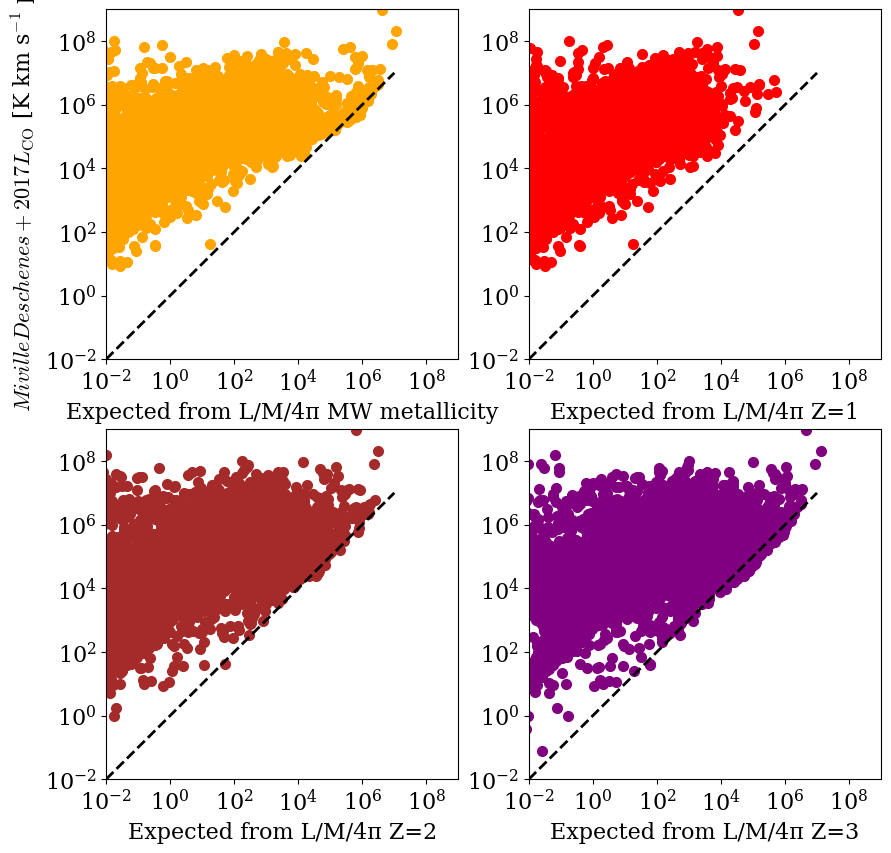

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100)
axs = axs.flatten()

for counter, (key, value) in enumerate(runs.items()):
    data = value["data"]
    label = value["label"]
    color = value["color"]
    
    ax = axs[counter]
    ax.scatter(
        data["L_co_10"], 
        data["Lco"], 
        label=label, 
        color=color,
        lw=2,
    )
    ax.plot(
        [1e-2, 1e7], 
        [1e-2, 1e7], 
        ls="--", 
        color="black", 
        lw=2, 
        label=r"$y=x$"
    )

    ax.set_xscale("log")
    ax.set_yscale("log")
    if counter == 0:
        ax.set_ylabel(r"$Miville Deschenes+2017 L_{\mathrm{CO}}$ [K km s$^{-1}$ pc$^2$]")

    ax.set_xlabel(value['label'])
    
    ax.set_xlim(1e-2, 1e9)
    ax.set_ylim(1e-2, 1e9)

plt.show()


In [35]:
for key, values in runs.items():
    deschenes_total_Lco = np.sum(values['data']['Lco'])
    my_total_Lco = np.sum(values['data']['L_co_10'])

    print(f"{key}:")
    print(f"    Miville Deschenes+2017 total Lco = {deschenes_total_Lco:.3e} K km s^-1 pc^2")
    print(f"    My total Lco = {my_total_Lco:.3e} K km s^-1 pc^2")
    print("\n\n")

expected from luminosity per mass by dividing to 4pi:
    Miville Deschenes+2017 total Lco = 1.078e+10 K km s^-1 pc^2
    My total Lco = 9.718e+07 K km s^-1 pc^2



expected from luminosity per mass by dividing to 4pi Z=1:
    Miville Deschenes+2017 total Lco = 1.063e+10 K km s^-1 pc^2
    My total Lco = 3.672e+06 K km s^-1 pc^2



expected from luminosity per mass by dividing to 4pi Z=2:
    Miville Deschenes+2017 total Lco = 1.063e+10 K km s^-1 pc^2
    My total Lco = 4.657e+07 K km s^-1 pc^2



expected from luminosity per mass by dividing to 4pi Z=3:
    Miville Deschenes+2017 total Lco = 1.063e+10 K km s^-1 pc^2
    My total Lco = 1.733e+08 K km s^-1 pc^2





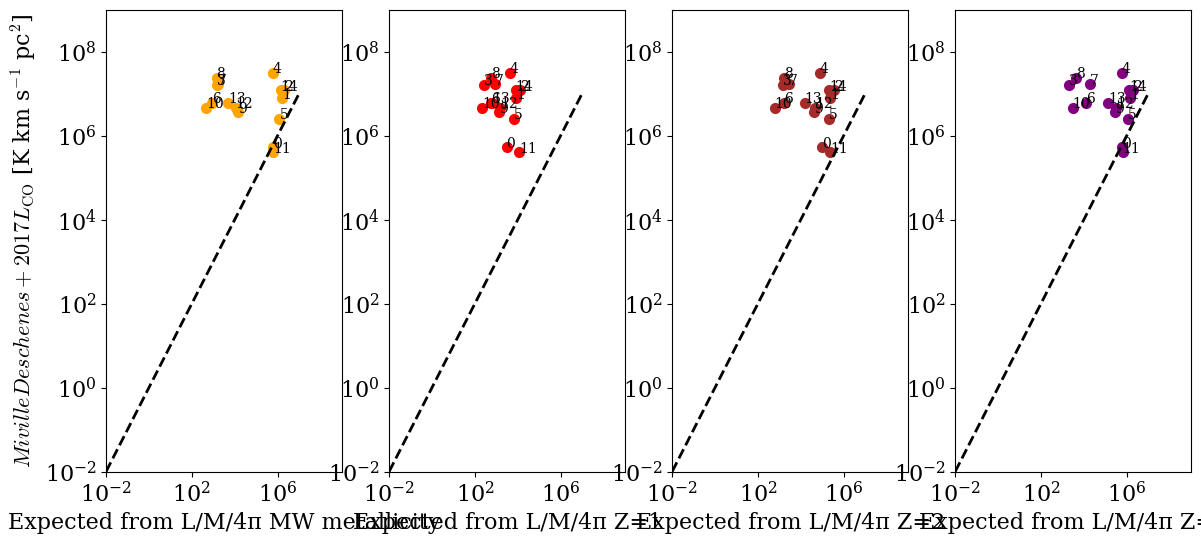

In [36]:
fig, axs = plt.subplots(1, 4, figsize=(14, 6), dpi=100)
axs = axs.flatten()

for counter, (key, value) in enumerate(runs.items()):
    # data = value["data"].iloc[600:650]
    data = value["data"].iloc[0:15]
    label = value["label"]
    color = value["color"]
    
    ax = axs[counter]
    ax.scatter(
        data["L_co_10"], 
        data["Lco"], 
        label=label, 
        color=color,
        lw=2,
    )
    ax.plot(
        [1e-2, 1e7], 
        [1e-2, 1e7], 
        ls="--", 
        color="black", 
        lw=2, 
        label=r"$y=x$"
    )

    ax.set_xscale("log")
    ax.set_yscale("log")
    if counter == 0:
        ax.set_ylabel(r"$Miville Deschenes+2017 L_{\mathrm{CO}}$ [K km s$^{-1}$ pc$^2$]")

    # print the corresponding row for each scatter point
    for i in range(len(data)):
        ax.text(data["L_co_10"].iloc[i], data["Lco"].iloc[i], f"{i}", fontsize=10)

    ax.set_xlabel(value['label'])
    
    ax.set_xlim(1e-2, 1e9)
    ax.set_ylim(1e-2, 1e9)

plt.show()


In [37]:
cloud_ids = []